In [3]:
'''
说明：
1、本文是利用kaggle内部的notebook进行代码复现的。尝试使用各种不同的机器学习平台，
   营造数据分析人员只负责专业分析，由平台提供基本的算法的模式。
   利用的火狐，需要安装hoxx，安装后，选择一个国家进行vpn后，即可注册kaggle。
2、除了复现代码，利用上一期学习的可视化课程，探索可视化数据分析。
3、了解正则表达式。https://www.jb51.net/article/177521.htm 这篇适合初学者
'''

'\n说明：\n1、本文是利用kaggle内部的notebook进行代码复现的。尝试使用各种不同的机器学习平台，\n   营造数据分析人员只负责专业分析，由平台提供基本的算法的模式。\n   利用的火狐，需要安装hoxx，安装后，选择一个国家进行vpn后，即可注册kaggle。\n2、除了复现代码，利用上一期学习的可视化课程，探索可视化数据分析。\n3、了解正则表达式。https://www.jb51.net/article/177521.htm 这篇适合初学者\n'

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arxiv/arxiv-metadata-oai-snapshot.json
/kaggle/input/website-url/website_url.txt


In [5]:
'''
任务1：论文数据统计
1.1 任务说明

    任务主题：论文数量统计，即统计2019年全年计算机各个方向论文数量；
    任务内容：赛题的理解、使用 Pandas 读取数据并进行统计；
    任务成果：学习 Pandas 的基础操作；
    可参考的学习资料：开源组织Datawhale joyful-pandas项目

'''

'\n任务1：论文数据统计\n1.1 任务说明\n\n    任务主题：论文数量统计，即统计2019年全年计算机各个方向论文数量；\n    任务内容：赛题的理解、使用 Pandas 读取数据并进行统计；\n    任务成果：学习 Pandas 的基础操作；\n    可参考的学习资料：开源组织Datawhale joyful-pandas项目\n\n'

In [6]:
'''
1.2 数据集介绍

    数据集来源：数据集链接；

    数据集的格式如下：
        id：arXiv ID，可用于访问论文；
        submitter：论文提交者；
        authors：论文作者；
        title：论文标题；
        comments：论文页数和图表等其他信息；
        journal-ref：论文发表的期刊的信息；
        doi：数字对象标识符，https://www.doi.org；
        report-no：报告编号；
        categories：论文在 arXiv 系统的所属类别或标签；
        license：文章的许可证；
        abstract：论文摘要；
        versions：论文版本；
        authors_parsed：作者的信息。

'''

'\n1.2 数据集介绍\n\n    数据集来源：数据集链接；\n\n    数据集的格式如下：\n        id：arXiv ID，可用于访问论文；\n        submitter：论文提交者；\n        authors：论文作者；\n        title：论文标题；\n        comments：论文页数和图表等其他信息；\n        journal-ref：论文发表的期刊的信息；\n        doi：数字对象标识符，https://www.doi.org；\n        report-no：报告编号；\n        categories：论文在 arXiv 系统的所属类别或标签；\n        license：文章的许可证；\n        abstract：论文摘要；\n        versions：论文版本；\n        authors_parsed：作者的信息。\n\n'

In [7]:
# 导入所需的package
import seaborn as sns #用于画图
from bs4 import BeautifulSoup #用于爬取arxiv的数据
import re #用于正则表达式，匹配字符串的模式
import requests #用于网络连接，发送网络请求，使用域名获取对应信息
import json #读取数据，我们的数据为json格式的
import pandas as pd #数据处理，数据分析
import matplotlib.pyplot as plt #画图工具

In [8]:
# 读入数据
data  = [] #初始化
#使用with语句优势：1.自动关闭文件句柄；2.自动显示（处理）文件读取数据异常
with open('/kaggle/input/arxiv/arxiv-metadata-oai-snapshot.json', 'r') as f: 
    for line in f: 
        data.append(json.loads(line))
        
data = pd.DataFrame(data) #将list变为dataframe格式，方便使用pandas进行分析
data.shape #显示数据大小

(1796911, 14)

In [9]:
data.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


In [11]:
'''1.4.2 数据预处理

首先我们先来粗略统计论文的种类信息：'''

'1.4.2 数据预处理\n\n首先我们先来粗略统计论文的种类信息：'

In [12]:
'''
count：一列数据的元素个数；
unique：一列数据中元素的种类；
top：一列数据中出现频率最高的元素；
freq：一列数据中出现频率最高的元素的个数；
'''

data["categories"].describe()

count      1796911
unique       62055
top       astro-ph
freq         86914
Name: categories, dtype: object

In [13]:
unique_categories = set([i for l in [x.split('- ') for x in data["categories"]] for i in l])
len(unique_categories)
unique_categories

{'cond-mat.stat-mech gr-qc math.CO physics.soc-ph',
 'physics.bio-ph cond-mat.stat-mech physics.chem-ph physics.comp-ph',
 'cs.LG cs.CV eess.IV math.OC stat.ML',
 'q-fin.MF q-fin.CP q-fin.GN',
 'hep-th hep-ph physics.atom-ph quant-ph',
 'math.RA math-ph math.CT math.MP math.QA',
 'cond-mat.stat-mech cond-mat.quant-gas hep-ph quant-ph',
 'stat.ME cs.LG math.NA',
 'quant-ph cs.CR physics.optics',
 'cond-mat.stat-mech cond-mat.dis-nn math.PR q-fin.PR',
 'hep-th math.DG math.QA',
 'cs.DM cs.DS cs.NE q-bio.PE',
 'hep-th hep-lat math-ph math.MP math.QA',
 'cond-mat.dis-nn physics.class-ph',
 'quant-ph nucl-th physics.comp-ph',
 'cs.CC cond-mat.stat-mech cs.SI math.PR physics.soc-ph',
 'cond-mat.quant-gas nucl-th physics.atm-clus quant-ph',
 'cond-mat.other astro-ph cond-mat.stat-mech cond-mat.str-el gr-qc physics.atom-ph',
 'physics.bio-ph cond-mat.soft physics.chem-ph physics.comp-ph q-bio',
 'cond-mat.str-el cond-mat.quant-gas cond-mat.stat-mech cond-mat.supr-con quant-ph',
 'cs.MS cs.AI m

In [ ]:
#我们的任务要求对于2019年以后的paper进行分析，所以首先对于时间特征进行预处理，从而得到2019年以后的所有种类的论文：

In [14]:
data["year"] = pd.to_datetime(data["update_date"]).dt.year #将update_date从例如2019-02-20的str变为datetime格式，并提取处year
del data["update_date"] #删除 update_date特征，其使命已完成
data = data[data["year"] >= 2019] #找出 year 中2019年以后的数据，并将其他数据删除

# data.groupby(['categories','year']) #以 categories 进行排序，如果同一个categories 相同则使用 year 特征进行排序
data.reset_index(drop=True, inplace=True) #重新编号
data #查看结果

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,authors_parsed,year
0,0704.0297,Sung-Chul Yoon,"Sung-Chul Yoon, Philipp Podsiadlowski and Step...",Remnant evolution after a carbon-oxygen white ...,"15 pages, 15 figures, 3 tables, submitted to M...",None,10.1111/j.1365-2966.2007.12161.x,None,astro-ph,None,We systematically explore the evolution of t...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...","[[Yoon, Sung-Chul, ], [Podsiadlowski, Philipp,...",2019
1,0704.0342,Patrice Ntumba Pungu,B. Dugmore and PP. Ntumba,Cofibrations in the Category of Frolicher Spac...,27 pages,None,None,None,math.AT,None,Cofibrations are defined in the category of ...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...","[[Dugmore, B., ], [Ntumba, PP., ]]",2019
2,0704.0360,Zaqarashvili,T.V. Zaqarashvili and K Murawski,Torsional oscillations of longitudinally inhom...,"6 pages, 3 figures, accepted in A&A",None,10.1051/0004-6361:20077246,None,astro-ph,None,We explore the effect of an inhomogeneous ma...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...","[[Zaqarashvili, T. V., ], [Murawski, K, ]]",2019
3,0704.0525,"Sezgin Ayg\""un","Sezgin Aygun, Ismail Tarhan, Husnu Baysal",On the Energy-Momentum Problem in Static Einst...,This submission has been withdrawn by arXiv ad...,"Chin.Phys.Lett.24:355-358,2007",10.1088/0256-307X/24/2/015,None,gr-qc,None,This paper has been removed by arXiv adminis...,"[{'version': 'v1', 'created': 'Wed, 4 Apr 2007...","[[Aygun, Sezgin, ], [Tarhan, Ismail, ], [Baysa...",2019
4,0704.0535,Antonio Pipino,"Antonio Pipino (1,3), Thomas H. Puzia (2,4), a...",The Formation of Globular Cluster Systems in M...,"32 pages (referee format), 9 figures, ApJ acce...","Astrophys.J.665:295-305,2007",10.1086/519546,None,astro-ph,None,The most massive elliptical galaxies show a ...,"[{'version': 'v1', 'created': 'Wed, 4 Apr 2007...","[[Pipino, Antonio, ], [Puzia, Thomas H., ], [M...",2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395118,quant-ph/9911051,Stephen A. Fulling,S. A. Fulling,"Large Numbers, the Chinese Remainder Theorem, ...",9 pages; Plain TeX with vanilla.sty and pictex...,"Phys. Rev. Applied 13, 024016 (2020)",10.1103/PhysRevApplied.13.024016,None,quant-ph,None,This is a pedagogical article cited in the f...,"[{'version': 'v1', 'created': 'Thu, 11 Nov 199...","[[Fulling, S. A., ]]",2020
395119,solv-int/9511005,Wen-Xiu Ma,"Wen-Xiu Ma, Benno Fuchssteiner",Explicit and Exact Solutions to a Kolmogorov-P...,"14pages, Latex, to appear in Intern. J. Nonlin...",None,10.1016/0020-7462(95)00064-X,None,solv-int nlin.SI,None,Some explicit traveling wave solutions to a ...,"[{'version': 'v1', 'created': 'Tue, 14 Nov 199...","[[Ma, Wen-Xiu, ], [Fuchssteiner, Benno, ]]",2019
395120,solv-int/9809008,Victor Enolskii,"J C Eilbeck, V Z Enol'skii, V B Kuznetsov, D V...",Linear r-Matrix Algebra for a Hierarchy of One...,"plain LaTeX, 28 pages",None,None,None,solv-int nlin.SI,None,We consider a hierarchy of many-particle sys...,"[{'version': 'v1', 'created': 'Wed, 2 Sep 1998...","[[Eilbeck, J C, ], [Enol'skii, V Z, ], [Kuznet...",2019
395121,solv-int/9909010,Pierre van Moerbeke,"M. Adler, T. Shiota and P. van Moerbeke",Pfaff tau-functions,42 pages,None,None,None,solv-int adap-org hep-th nlin.AO nlin.SI,None,Consider the evolution $$ \frac{\pl m_\iy}{\...,"[{'version': 'v1', 'created': 'Wed, 15 Sep 199...","[[Adler, M., ], [Shiota, T., ], [van Moerbeke,...",2019


In [15]:
#requests.packages.urllib3.disable_warnings()
#website_url = requests.get('https://arxiv.org/category_taxonomy',verify=False).text #获取网页的文本数据
#website_url
#报错，可以用上传的文件
with open('/kaggle/input/website-url/website_url.txt', 'r') as f1:
    website_url = f1.read()

In [16]:
#这里我们就已经得到了所有2019年以后的论文，下面我们挑选出计算机领域内的所有文章：
#爬取所有的类别
#website_url = requests.get('https://arxiv.org/category_taxonomy').text #获取网页的文本数据
soup = BeautifulSoup(website_url,'lxml') #爬取数据，这里使用lxml的解析器，加速
root = soup.find('div',{'id':'category_taxonomy_list'}) #找出 BeautifulSoup 对应的标签入口
tags = root.find_all(["h2","h3","h4","p"], recursive=True) #读取 tags

#初始化 str 和 list 变量
level_1_name = ""
level_2_name = ""
level_2_code = ""
level_1_names = []
level_2_codes = []
level_2_names = []
level_3_codes = []
level_3_names = []
level_3_notes = []

#进行
for t in tags:
    if t.name == "h2":
        level_1_name = t.text    
        level_2_code = t.text
        level_2_name = t.text
    elif t.name == "h3":
        raw = t.text
        level_2_code = re.sub(r"(.*)\((.*)\)",r"\2",raw) #正则表达式：模式字符串：(.*)\((.*)\)；被替换字符串"\2"；被处理字符串：raw
        level_2_name = re.sub(r"(.*)\((.*)\)",r"\1",raw)
    elif t.name == "h4":
        raw = t.text
        level_3_code = re.sub(r"(.*) \((.*)\)",r"\1",raw)
        level_3_name = re.sub(r"(.*) \((.*)\)",r"\2",raw)
    elif t.name == "p":
        notes = t.text
        level_1_names.append(level_1_name)
        level_2_names.append(level_2_name)
        level_2_codes.append(level_2_code)
        level_3_names.append(level_3_name)
        level_3_codes.append(level_3_code)
        level_3_notes.append(notes)

#根据以上信息生成dataframe格式的数据
df_taxonomy = pd.DataFrame({
    'group_name' : level_1_names,
    'archive_name' : level_2_names,
    'archive_id' : level_2_codes,
    'category_name' : level_3_names,
    'categories' : level_3_codes,
    'category_description': level_3_notes
    
})

#按照 "group_name" 进行分组，在组内使用 "archive_name" 进行排序
df_taxonomy.groupby(["group_name","archive_name"])
df_taxonomy

,group_name,archive_name,archive_id,category_name,categories,category_description
0,Computer Science,Computer Science,Computer Science,Artificial Intelligence,cs.AI,"Covers all areas of AI except Vision, Robotics..."
1,Computer Science,Computer Science,Computer Science,Hardware Architecture,cs.AR,Covers systems organization and hardware archi...
2,Computer Science,Computer Science,Computer Science,Computational Complexity,cs.CC,"Covers models of computation, complexity class..."
3,Computer Science,Computer Science,Computer Science,"Computational Engineering, Finance, and Science",cs.CE,Covers applications of computer science to the...
4,Computer Science,Computer Science,Computer Science,Computational Geometry,cs.CG,Roughly includes material in ACM Subject Class...
...,...,...,...,...,...,...
150,Statistics,Statistics,Statistics,Computation,stat.CO,"Algorithms, Simulation, Visualization"
151,Statistics,Statistics,Statistics,Methodology,stat.ME,"Design, Surveys, Model Selection, Multiple Tes..."
152,Statistics,Statistics,Statistics,Machine Learning,stat.ML,"Covers machine learning papers (supervised, un..."
153,Statistics,Statistics,Statistics,Other Statistics,stat.OT,Work in statistics that does not fit into the ...


In [ ]:
'''
这里主要说明一下上面代码中的正则操作，这里我们使用re.sub来用于替换字符串中的匹配项

pattern : 正则中的模式字符串。
repl : 替换的字符串，也可为一个函数。
string : 要被查找替换的原始字符串。
count : 模式匹配后替换的最大次数，默认 0 表示替换所有的匹配。
flags : 编译时用的匹配模式，数字形式。
其中pattern、repl、string为必选参数
re.sub(pattern, repl, string, count=0, flags=0)

实例如下：
'''

In [ ]:
import re

phone = "2004-959-559 # 这是一个电话号码"
 
# 删除注释
num = re.sub(r'#.*$', "", phone)
print ("电话号码 : ", num)
 
# 移除非数字的内容
num = re.sub(r'\D', "", phone)
print ("电话号码 : ", num)

In [ ]:
#正则表达式可参考：https://www.jb51.net/article/177521.htm

In [ ]:
'''
数据分析及可视化
接下来我们首先看一下所有大类的paper数量分布：

我们使用merge函数，以两个dataframe共同的属性 “categories” 进行合并，并以 “group_name” 作为类别进行统计，统计结果放入 “id” 列中并排序。


'''

In [17]:
_df = data.merge(df_taxonomy, on="categories", how="left").drop_duplicates(["id","group_name"]).groupby("group_name").agg({"id":"count"}).sort_values(by="id",ascending=False).reset_index()

_df

,group_name,id
0,Physics,79985
1,Mathematics,51567
2,Computer Science,40067
3,Statistics,4054
4,Electrical Engineering and Systems Science,3297
5,Quantitative Biology,1994
6,Quantitative Finance,826
7,Economics,576


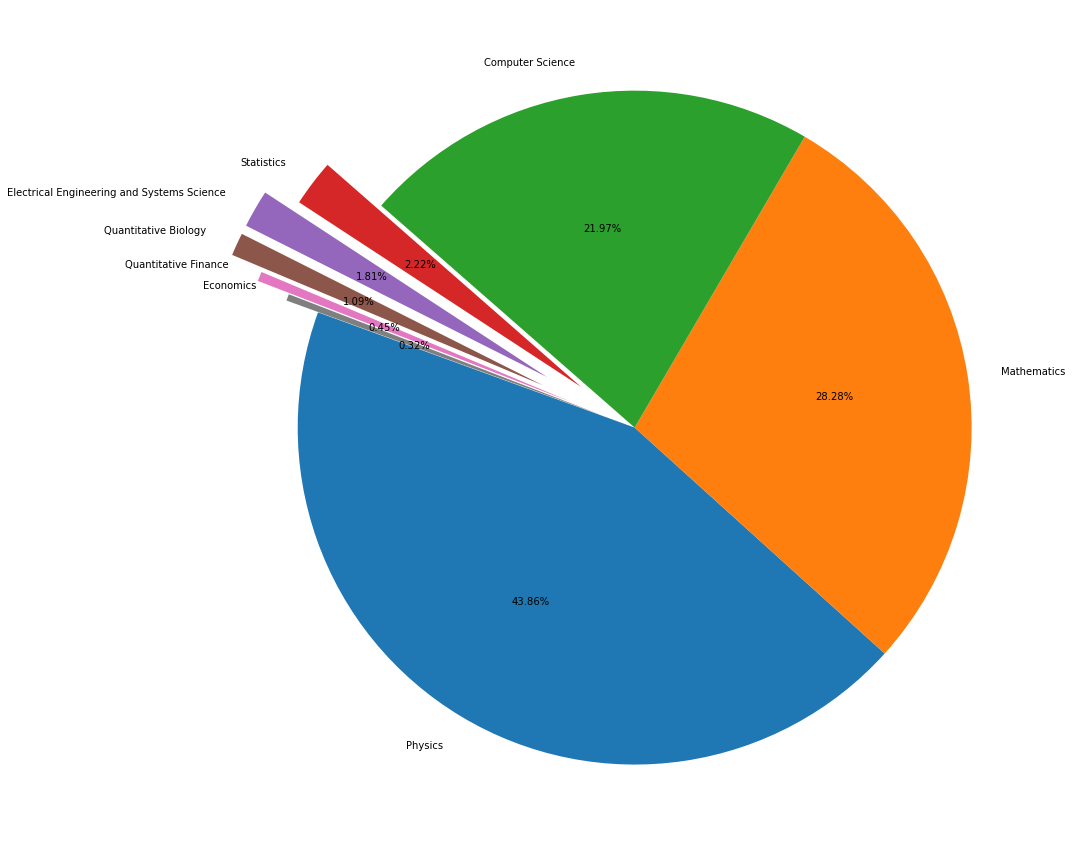

In [18]:
fig = plt.figure(figsize=(15,12))
explode = (0, 0, 0, 0.2, 0.3, 0.3, 0.2, 0.1) 
plt.pie(_df["id"],  labels=_df["group_name"], autopct='%1.2f%%', startangle=160, explode=explode)
plt.tight_layout()
plt.show()

In [21]:
#下面统计在计算机各个子领域2019年后的paper数量，我们同样使用 merge 函数，对于两个dataframe 共同的特征 categories 进行合并并且进行查询。然后我们再对于数据进行统计和排序从而得到以下的结果：
group_name="Computer Science"
cats = data.merge(df_taxonomy, on="categories").query("group_name == @group_name")
cats.groupby(["year","category_name"]).count().reset_index().pivot(index="category_name", columns="year",values="id") 


year,2019,2020
category_name,,
Artificial Intelligence,558,757
Computation and Language,2153,2906
Computational Complexity,131,188
"Computational Engineering, Finance, and Science",108,205
Computational Geometry,199,216
Computer Science and Game Theory,281,323
Computer Vision and Pattern Recognition,5559,6517
Computers and Society,346,564
Cryptography and Security,1067,1238


In [26]:
cats.to_csv('/kaggle/working/cats.csv')

In [27]:
import pandas as pd
cats=pd.read_csv('/kaggle/working/cats.csv')
cats

,Unnamed: 0,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,authors_parsed,year,group_name,archive_name,archive_id,category_name,category_description
0,38628,0705.0599,Nathalie Henry,"Nathalie Henry, Jean-Daniel Fekete, Michael Mc...",NodeTrix: Hybrid Representation for Analyzing ...,NaN,NaN,10.1109/TVCG.2007.70582,NaN,cs.HC,NaN,The need to visualize large social networks ...,"[{'version': 'v1', 'created': 'Fri, 4 May 2007...","[['Henry', 'Nathalie', ''], ['Fekete', 'Jean-D...",2020,Computer Science,Computer Science,Computer Science,Human-Computer Interaction,"Covers human factors, user interfaces, and col..."
1,38629,1007.5158,Secretary Iju,Ayman Atia and Jiro Tanaka (University of Tsuk...,Interaction With Tilting Gestures In Ubiquitou...,"13 pages, 10 figures",International Journal Of UbiComp 1.3 (2010) 1-13,10.5121/iju.2010.1301,NaN,cs.HC,http://creativecommons.org/licenses/by-nc-sa/3.0/,"In this paper, we introduce a tilting interf...","[{'version': 'v1', 'created': 'Thu, 29 Jul 201...","[['Atia', 'Ayman', '', 'University of Tsukuba,...",2019,Computer Science,Computer Science,Computer Science,Human-Computer Interaction,"Covers human factors, user interfaces, and col..."
2,38630,1401.7735,Nitesh Goyal,"Anuj Tewari, Nitesh Goyal, Matthew K Chan, Tin...",SPRING: speech and pronunciation improvement t...,ACM ICTD 2010,NaN,10.1145/2369220.2369265,NaN,cs.HC,http://arxiv.org/licenses/nonexclusive-distrib...,Lack of proper English pronunciations is a m...,"[{'version': 'v1', 'created': 'Thu, 30 Jan 201...","[['Tewari', 'Anuj', ''], ['Goyal', 'Nitesh', '...",2019,Computer Science,Computer Science,Computer Science,Human-Computer Interaction,"Covers human factors, user interfaces, and col..."
3,38631,1410.1648,Shengkai Zhang,Shengkai Zhang and Pan Hui,A Survey on Mobile Affective Computing,There will be another paper for this topic. Th...,NaN,NaN,NaN,cs.HC,http://arxiv.org/licenses/nonexclusive-distrib...,This survey presents recent progress on Affe...,"[{'version': 'v1', 'created': 'Tue, 7 Oct 2014...","[['Zhang', 'Shengkai', ''], ['Hui', 'Pan', '']]",2019,Computer Science,Computer Science,Computer Science,Human-Computer Interaction,"Covers human factors, user interfaces, and col..."
4,38632,1603.02642,Paul Issartel,"Paul Issartel (UP11,LIMSI), Lonni Besan\c{c}on...",A Tangible Volume for Portable 3D Interaction,NaN,NaN,10.1109/ISMAR-Adjunct.2016.0079,NaN,cs.HC,http://arxiv.org/licenses/nonexclusive-distrib...,We present a new approach to achieve tangibl...,"[{'version': 'v1', 'created': 'Tue, 8 Mar 2016...","[['Issartel', 'Paul', '', 'UP11,LIMSI'], ['Bes...",2020,Computer Science,Computer Science,Computer Science,Human-Computer Interaction,"Covers human factors, user interfaces, and col..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40062,182361,1908.09549,Juergen Winkler,Juergen F. H. Winkler,Oprema -- The Relay Computer of Carl Zeiss Jena,"33 pages, 18 figures, 2 tables",NaN,NaN,NaN,cs.GL,http://arxiv.org/licenses/nonexclusive-distrib...,The Oprema (Optikrechenmaschine = computer f...,"[{'version': 'v1', 'created': 'Mon, 26 Aug 201...","[['Winkler', 'Juergen F. H.', '']]",2019,Computer Science,Computer Science,Computer Science,General Literature,"Covers introductory material, survey material,..."
40063,182362,2003.01771,Miguel Sanjuan,Miguel A. F. Sanjuan,"Artificial Intelligence, Chaos, Prediction and...",NaN,NaN,NaN,NaN,cs.GL,http://arxiv.org/licenses/nonexclusive-distrib...,Machine learning and deep learning technique...,"[{'version': 'v1', 'created': 'Tue, 3 Mar 2020...","[['Sanjuan', 'Miguel A. F.', '']]",2020,Computer Science,Computer Science,Computer Science,General Literature,"Covers introductory material, survey material,..."
40064,182363,2006.11842,Adolfo Guzman-Arenas,"Sergei Levashkin (Artificial Intelligence Lab,...",Kolmogorov's legacy: Algorithmic Theory of Inf...,"16 pages, one figure",NaN,NaN,NaN,cs.GL,http://creativecommo

In [28]:
import matplotlib.pyplot as plt
import numpy as np

In [38]:
#数据准备
catgroup=cats.groupby(["year","category_name"]).count().reset_index().pivot(index="category_name", columns="year",values="id") 

catgroup.index

Index(['Artificial Intelligence', 'Computation and Language',
       'Computational Complexity',
       'Computational Engineering, Finance, and Science',
       'Computational Geometry', 'Computer Science and Game Theory',
       'Computer Vision and Pattern Recognition', 'Computers and Society',
       'Cryptography and Security', 'Data Structures and Algorithms',
       'Databases', 'Digital Libraries', 'Discrete Mathematics',
       'Distributed, Parallel, and Cluster Computing', 'Emerging Technologies',
       'Formal Languages and Automata Theory', 'General Literature',
       'Graphics', 'Hardware Architecture', 'Human-Computer Interaction',
       'Information Retrieval', 'Logic in Computer Science',
       'Machine Learning', 'Mathematical Software', 'Multiagent Systems',
       'Multimedia', 'Networking and Internet Architecture',
       'Neural and Evolutionary Computing', 'Numerical Analysis',
       'Operating Systems', 'Other Computer Science', 'Performance',
       'Prog

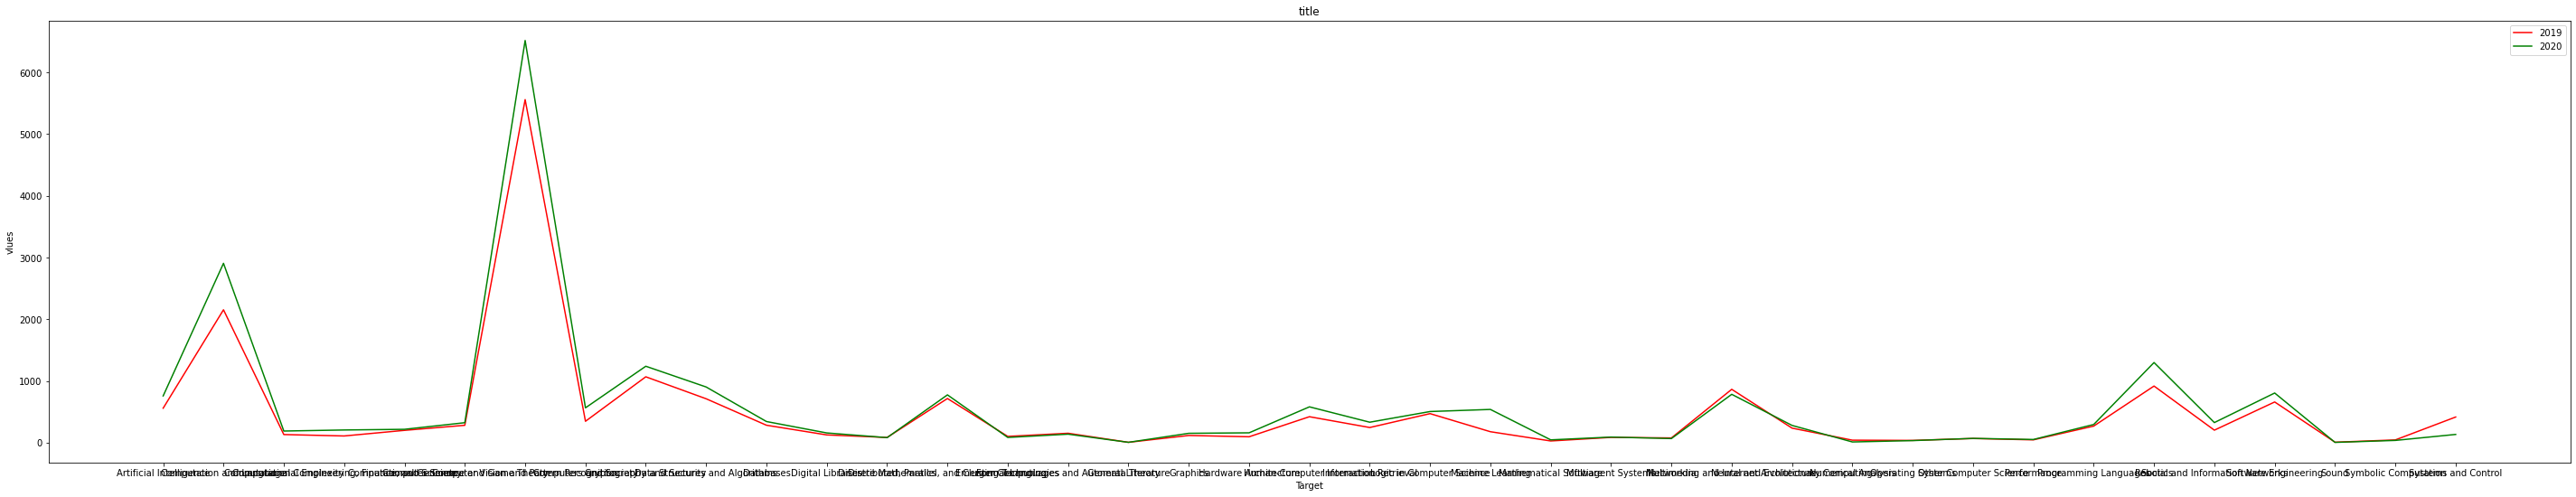

In [57]:
figsize = 100, 9
figure, ax = plt.subplots(figsize=figsize)
plt.plot(range(len(catgroup.index)), catgroup.values[:,0], 'r-',label = '2019')
plt.plot(range(len(catgroup.index)), catgroup.values[:,1], 'g-',label = '2020')
plt.xticks(range(len(catgroup.index)),catgroup.index)
plt.xlabel('Target')
plt.ylabel('vlues')
plt.title("title")

ax = plt.gca()
#ax.invert_yaxis() #y轴反向

plt.legend()  # 显示左下角的图例
plt.show()

In [49]:
list(catgroup.values[:,0])

[558,
 2153,
 131,
 108,
 199,
 281,
 5559,
 346,
 1067,
 711,
 282,
 125,
 84,
 715,
 101,
 152,
 5,
 116,
 95,
 420,
 245,
 470,
 177,
 27,
 85,
 76,
 864,
 235,
 40,
 36,
 67,
 45,
 268,
 917,
 202,
 659,
 7,
 44,
 415]